In [1]:
import numpy as np
from pathlib import Path
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../')
from core.models import MNISTDenseClassifier
from core.initializers import He, Xavier
from core.optimizers import GradDesc, Momentum, Adagrad, RMSProp, Adam
from core.losses import Crossentropy
from core.activations import ReLu, Softmax
from core.metrics import Precision, Recall, Roc_Auc

## Считывание данных из бинарных файлов

In [3]:
project_path =  Path.cwd().parent
data_path = project_path / "data"
preproc_path = data_path / "preprocessed"

source_train_im_path = preproc_path / "train-images-idx3-ubyte.bin"
source_train_l_path = preproc_path / "train-labels-idx1-ubyte.bin"
source_test_im_path = preproc_path / "t10k-images-idx3-ubyte.bin"
source_test_l_path = preproc_path / "t10k-labels-idx1-ubyte.bin"


### Обучающая выборка

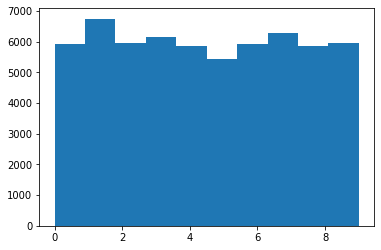

In [4]:
# Метки обуающей выборки
train_labels = np.fromfile(source_train_l_path, dtype=np.uint8, offset=8)
plt.hist(train_labels);

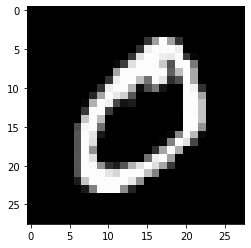

In [5]:
# Изображения обучающей выборки
train_size, rows, columns = 60000, 28, 28
train_images = np.fromfile(source_train_im_path, dtype=np.uint8, offset=16).reshape((train_size, rows, columns))
plt.imshow(train_images[1,:,:], cmap='gray')

### Тестовая выборка

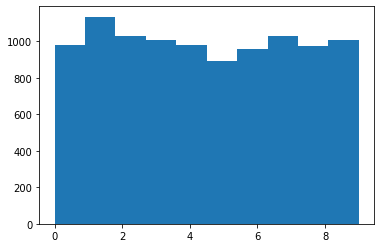

In [21]:
# Метки тестовой выборки
test_labels = np.fromfile(source_test_l_path, dtype=np.uint8, offset=8)
plt.hist(test_labels);

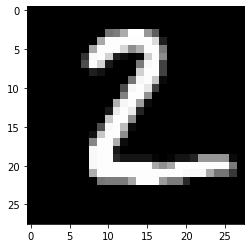

In [22]:
# Изображения тестовой выборки
test_size, rows, columns = 10000, 28, 28
test_images = np.fromfile(source_test_im_path, dtype=np.uint8, offset=16).reshape((test_size, rows, columns))
plt.imshow(test_images[1,:,:], cmap='gray')

## Создадим модель 

In [8]:
n_train = 40000
n_classes = 10
prepared_labels = train_labels[:n_train]
prepared_images = train_images[:n_train].reshape(n_train, -1)
prepared_images = (prepared_images > 0).astype(np.uint8)

### GradDesc

In [9]:
model_grad = MNISTDenseClassifier(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=GradDesc(0.001),
    loss=Crossentropy,
    need_batch_normaliser=True
)
metrics = [Precision(), Recall()]
history_grad = model_grad.fit(1, 64, prepared_images, prepared_labels, metrics=metrics, l1=10**(-4), l2=10**(-4))

By epoch progress


Iter 1


500it [00:10, 49.08it/s]


Mean loss: 1.1200000047683716
Fit scores: Precision 0.8138 | Recall 0.8129
Validation scores: Precision 0.8153 | Recall 0.8134


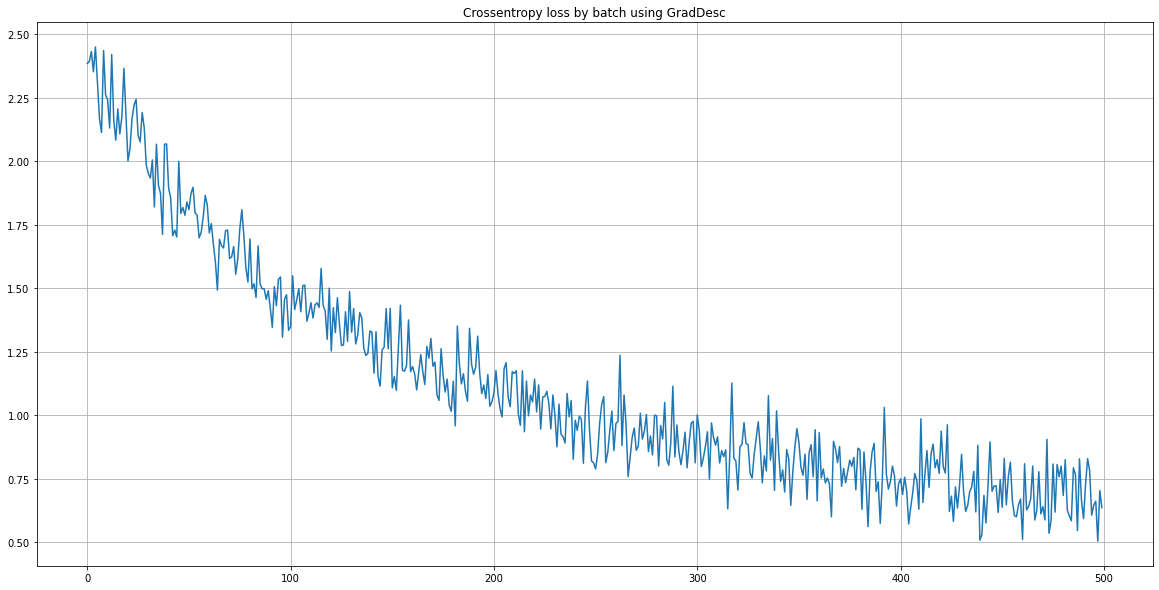

In [10]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using GradDesc")
plt.grid()
plt.plot(history_grad.flatten())

### Momentum

In [11]:
model_momentum = MNISTDenseClassifier(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=Momentum(learning_rate=0.0001, momentum=0.9),
    loss=Crossentropy,
    need_batch_normaliser=True
)
metrics = [Precision(), Recall()]
history_momentum = model_momentum.fit(1, 64, prepared_images, prepared_labels, metrics=metrics, l1=10**(-3), l2=10**(-4))

By epoch progress


Iter 1


500it [00:09, 52.39it/s]


Mean loss: 1.1299999952316284
Fit scores: Precision 0.8085 | Recall 0.8066
Validation scores: Precision 0.8047 | Recall 0.8022


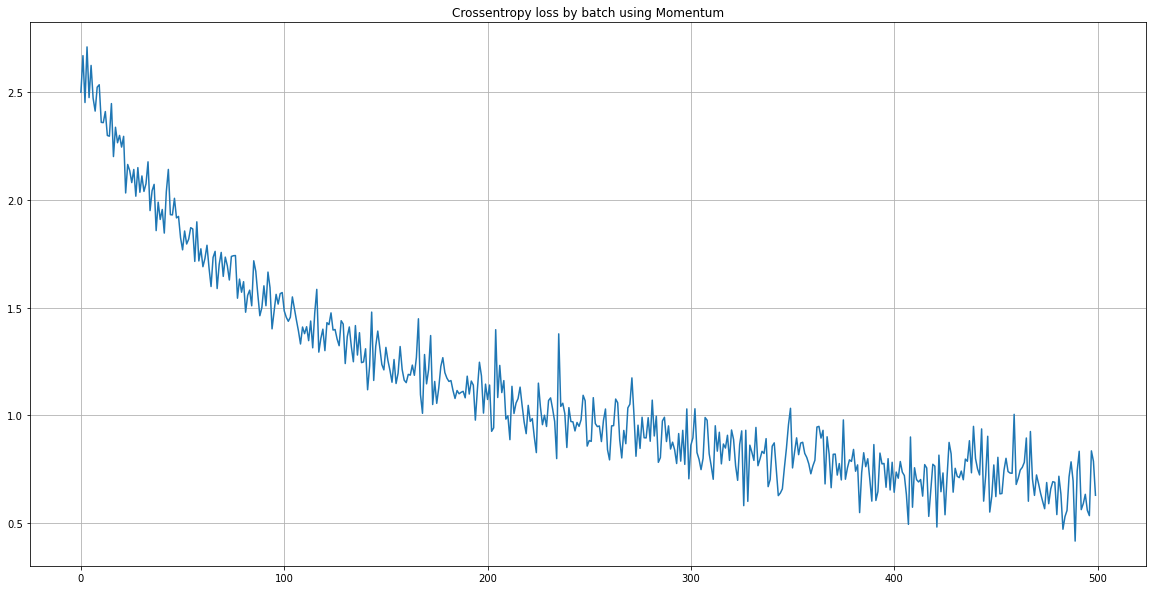

In [12]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using Momentum")
plt.grid()
plt.plot(history_momentum.flatten())

### Adagrad

In [13]:
model_adagrad = MNISTDenseClassifier(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=Adagrad(0.001),
    loss=Crossentropy,
    need_batch_normaliser=True
)
metrics = [Precision(), Recall()]
history_adagrad = model_adagrad.fit(1, 64, prepared_images, prepared_labels, metrics=metrics, l1=10**(-4), l2=10**(-4))

By epoch progress


Iter 1


500it [00:12, 38.70it/s]


Mean loss: 0.9900000095367432
Fit scores: Precision 0.8303 | Recall 0.8258
Validation scores: Precision 0.8256 | Recall 0.8223


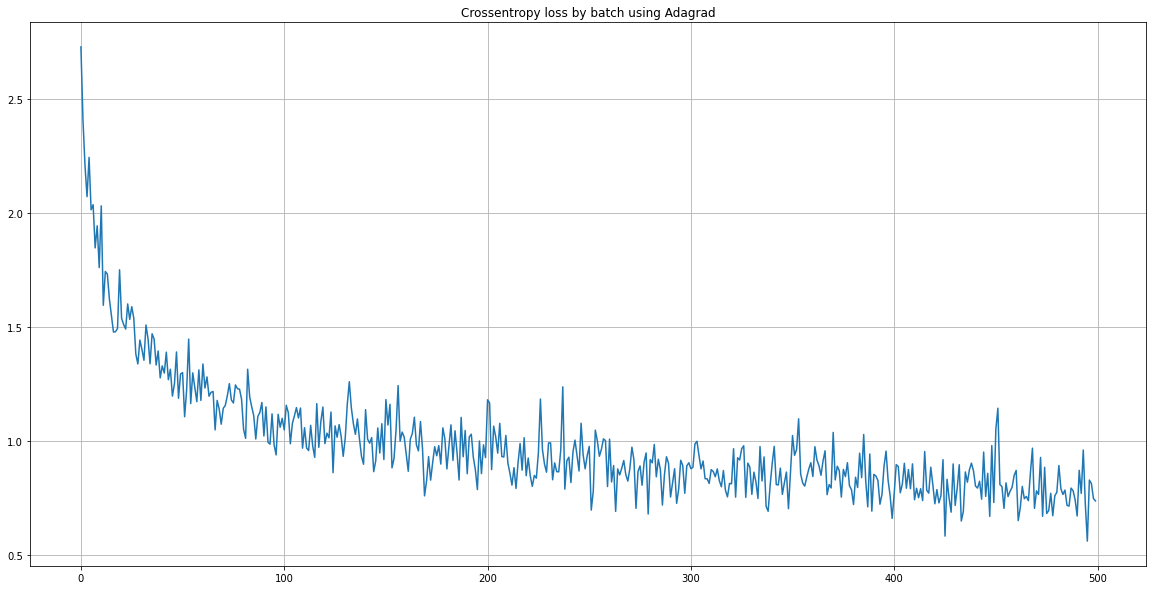

In [14]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using Adagrad")
plt.grid()
plt.plot(history_adagrad.flatten())

### RMSProp

In [15]:
model_rmsprop = MNISTDenseClassifier(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=RMSProp(0.01, momentum=0.9),
    loss=Crossentropy,
    need_batch_normaliser=True
)
metrics = [Precision(), Recall()]
history_rmsprop = model_rmsprop.fit(1, 64, prepared_images, prepared_labels, metrics=metrics, l1=10**(-2), l2=10**(-2))

By epoch progress


Iter 1


500it [00:12, 39.04it/s]


Mean loss: 0.8500000238418579
Fit scores: Precision 0.794 | Recall 0.7827
Validation scores: Precision 0.8023 | Recall 0.7901


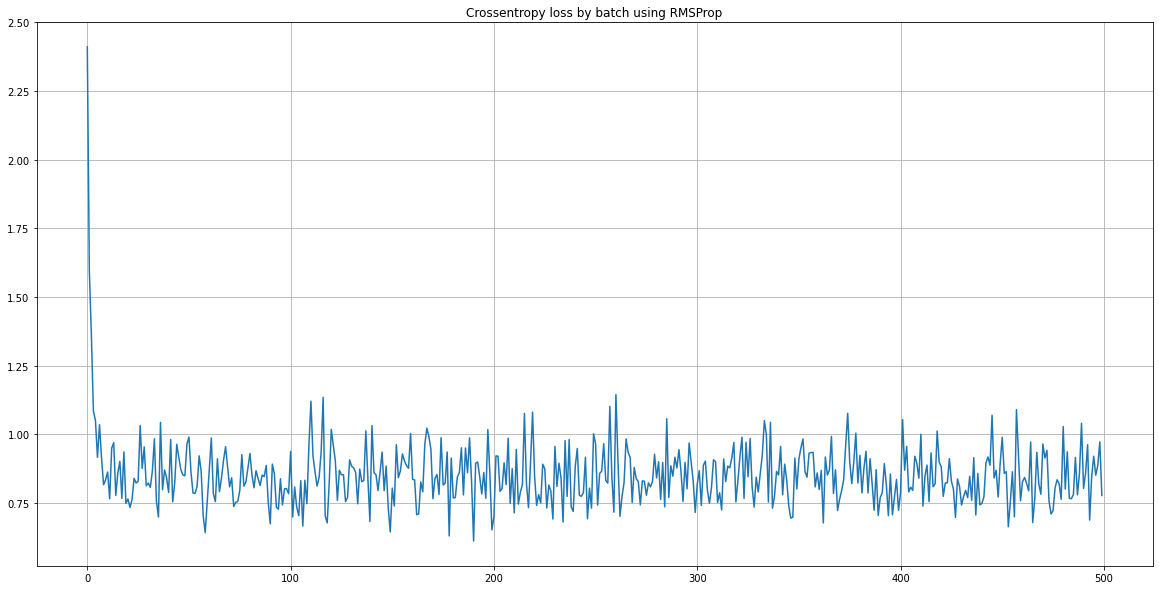

In [16]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using RMSProp")
plt.grid()
plt.plot(history_rmsprop.flatten())

### Adam

In [17]:
model_adam = MNISTDenseClassifier(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=Adam(10**(-3), momentum_1=0.9, momentum_2=0.9),
    loss=Crossentropy,
    need_batch_normaliser=True
)
metrics = [Precision(), Recall()]
history_adam = model_adam.fit(1, 64, prepared_images, prepared_labels, metrics=metrics, l1=10**(-3), l2=10**(-4))

By epoch progress


Iter 1


500it [00:14, 34.83it/s]


Mean loss: 0.49000000953674316
Fit scores: Precision 0.9 | Recall 0.8988
Validation scores: Precision 0.8995 | Recall 0.8986


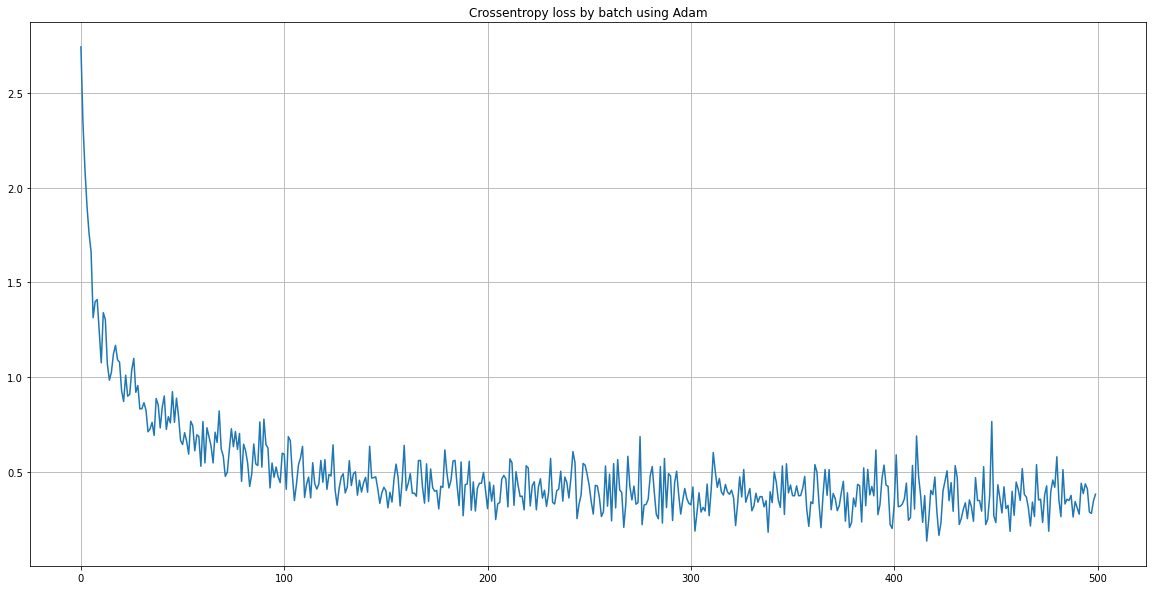

In [18]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch using Adam")
plt.grid()
plt.plot(history_adam.flatten())

### Сравнение моделей

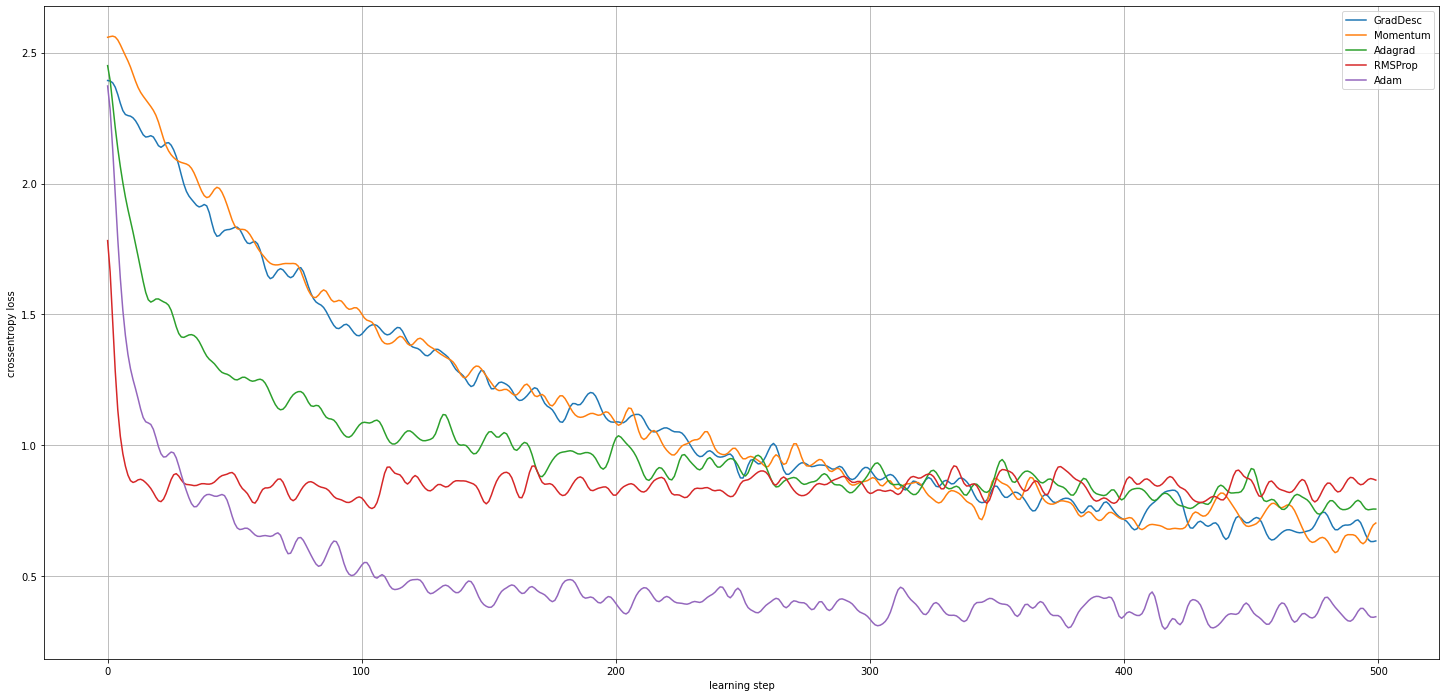

In [32]:
legend = ['GradDesc', 'Momentum', 'Adagrad', 'RMSProp', 'Adam']
losses_hub = [history_grad, history_momentum, history_adagrad, history_rmsprop, history_adam]
plt.figure(figsize=(25,12))
for loss in losses_hub:
    curve = gaussian_filter1d(loss.flatten(), sigma=2)
    plt.plot(curve)
plt.grid()
plt.legend(legend);
plt.ylabel("crossentropy loss");
plt.xlabel("learning step");

In [29]:
model_hub = [model_grad, model_momentum, model_adagrad, model_rmsprop, model_adam]
prepared_t_labels = test_labels
prepared_t_images = test_images.reshape(test_size, -1)
prepared_t_images = (prepared_t_images > 0).astype(np.uint8)
for model, title in zip(model_hub, legend):
    test_prediction = model.predict(prepared_t_images)
    print( title +
        " Test scores: "
            + " | ".join((m.__class__.__name__ + " " 
                        + str(round(m.calc(prepared_t_labels, test_prediction), 4))
                            for m in metrics)))

GradDesc Test scores: Precision 0.8199 | Recall 0.8199
Momentum Test scores: Precision 0.8137 | Recall 0.8118
Adagrad Test scores: Precision 0.8379 | Recall 0.8342
RMSProp Test scores: Precision 0.8028 | Recall 0.7911
Adam Test scores: Precision 0.901 | Recall 0.9002
